# Palindrome Data Interview Assignment
## Matthew Swanevelder

## ---------------------------------------------------------------------------------------------------

### Data Summary 

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel(r"C:\Users\matts\Downloads\pone.0212445.s004.xlsx", header=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        104 non-null    object 
 1   Code            104 non-null    object 
 2   Estimate        104 non-null    object 
 3   Prevalence_%    104 non-null    float64
 4   Prevalence_LCL  104 non-null    float64
 5   Prevalence_UCL  104 non-null    float64
 6   NoPLHIV         104 non-null    int64  
 7   NoPLHIV_LCL     104 non-null    int64  
 8   NoPLHIV_UCL     104 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 7.4+ KB


,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789


In [182]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Prevalence_%,104.0,12.113805,4.978586,1.584032,8.869829,11.750000,15.718785,25.000000
Prevalence_LCL,104.0,8.507655,4.635330,0.000000,4.911882,8.165653,11.617805,18.218028
Prevalence_UCL,104.0,16.142182,6.055076,2.998406,12.301325,15.935119,19.378361,40.945994
NoPLHIV,104.0,123914.230769,115469.372356,1876.000000,46667.500000,99751.500000,146335.500000,515387.000000
NoPLHIV_LCL,104.0,89210.009615,89791.909524,0.000000,28057.750000,69407.500000,115101.250000,408472.000000
NoPLHIV_UCL,104.0,162458.317308,145761.963447,3552.000000,68507.750000,136812.000000,181302.250000,660996.000000


### Question 2a

In [183]:
tmp=df[df['Estimate']=='Survey'][['District','NoPLHIV']] 
print(tmp)

                      District  NoPLHIV
0                 Buffalo City   102437
2            City of Cape Town   200751
4                   West Coast    11302
6                       Cacadu    34732
8                      Amatole    98884
10                  Chris Hani   114849
12                   Joe Gqabi    37766
14                  O.R. Tambo   160352
16                     Xhariep    11777
18               Lejweleputswa   123868
20          Thabo Mofutsanyana   115006
22              Cape Winelands    30706
24                 Fezile Dabi    45550
26                         Ugu   142979
28               uMgungundlovu   221073
30                    uThukela   118124
32                  uMzinyathi    93587
34                     Amajuba    82210
36                    Zululand   171411
38                uMkhanyakude    86131
40                   uThungulu   162238
42                      iLembe    78178
44                    Overberg    17039
46                Gert Sibande   208067


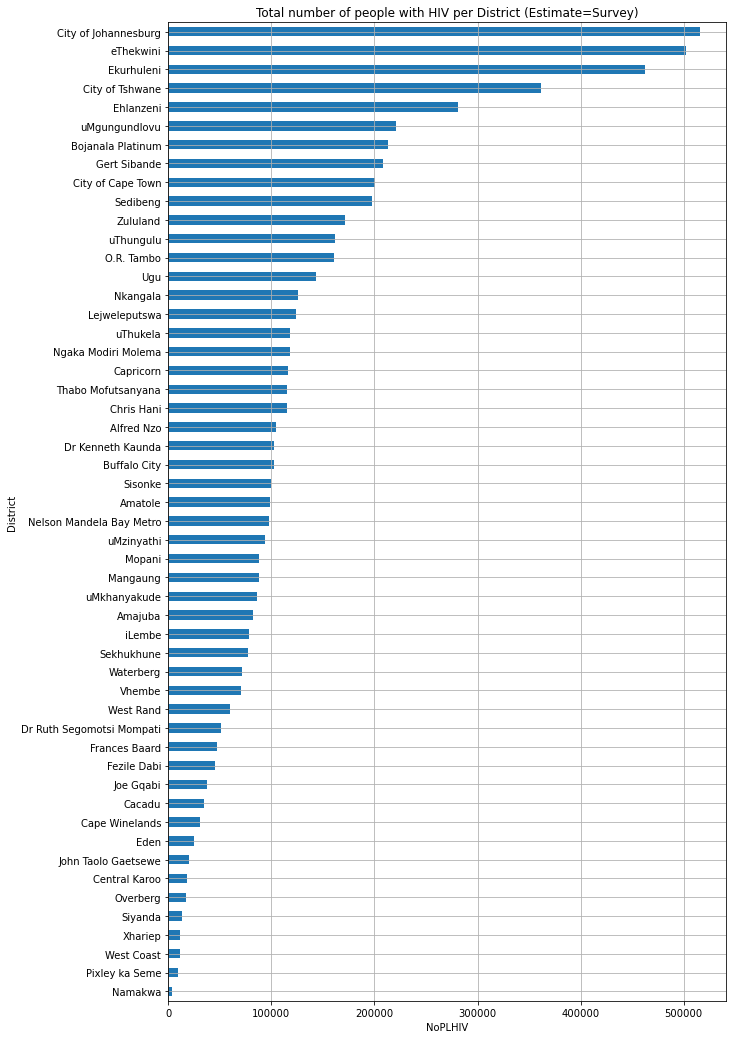

In [184]:
tmp.sort_values(by='NoPLHIV').plot.barh(x='District', y='NoPLHIV',figsize=(10, 18))
plt.title('Total number of people with HIV per District (Estimate=Survey)')
plt.xlabel('NoPLHIV')
plt.legend().remove()
plt.grid()
plt.show()

### Question 2b

In [185]:
print('Average NoPLHIV for Xhariep: ', df[df['District']=='Xhariep']['NoPLHIV'].mean())

Average NoPLHIV for Xhariep:  12247.5


### Question 2c

Total_people_in_district=(NoPLHIV*100)/Prevalence_%

People_without_HIV = Total_people_in_district*((100-Prevalence_%)/100)

In [186]:
pl_without_HIV=[]

for index, row in df.iterrows():
    total_pl=(row['NoPLHIV']*100)/row['Prevalence_%']
    pl_without_HIV.append(total_pl*((100-row['Prevalence_%'])/100))
    
df['pl_without_HIV']=pl_without_HIV

In [187]:
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,pl_without_HIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,6.507762e+05
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,6.515169e+05
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3.659845e+06
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3.628178e+06
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,4.072906e+05


### Question 2d

In [188]:
df['District']=df['District'].str.lower() # contains() function is case sensitive,therefore all district names are changed to lower-case
tmp_df=df[df['District'].str.contains('city') | df['District'].str.contains('metro')][['District','Estimate','NoPLHIV']]
print(tmp_df)

                     District     Estimate  NoPLHIV
0                buffalo city       Survey   102437
1                buffalo city  Fay-Heriott   101693
2           city of cape town       Survey   200751
3           city of cape town  Fay-Heriott   232409
96       city of johannesburg       Survey   515387
97       city of johannesburg  Fay-Heriott   514241
100  nelson mandela bay metro       Survey    97459
101  nelson mandela bay metro  Fay-Heriott   106313
102           city of tshwane       Survey   361450
103           city of tshwane  Fay-Heriott   340593


### Question 3

In [189]:
df.columns=df.columns.str.replace('[^a-zA-Z]', '', regex=True)

In [190]:
df.head()

,District,Code,Estimate,Prevalence,PrevalenceLCL,PrevalenceUCL,NoPLHIV,NoPLHIVLCL,NoPLHIVUCL,plwithoutHIV
0,buffalo city,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,6.507762e+05
1,buffalo city,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,6.515169e+05
2,city of cape town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3.659845e+06
3,city of cape town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3.628178e+06
4,west coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,4.072906e+05


### Question 4

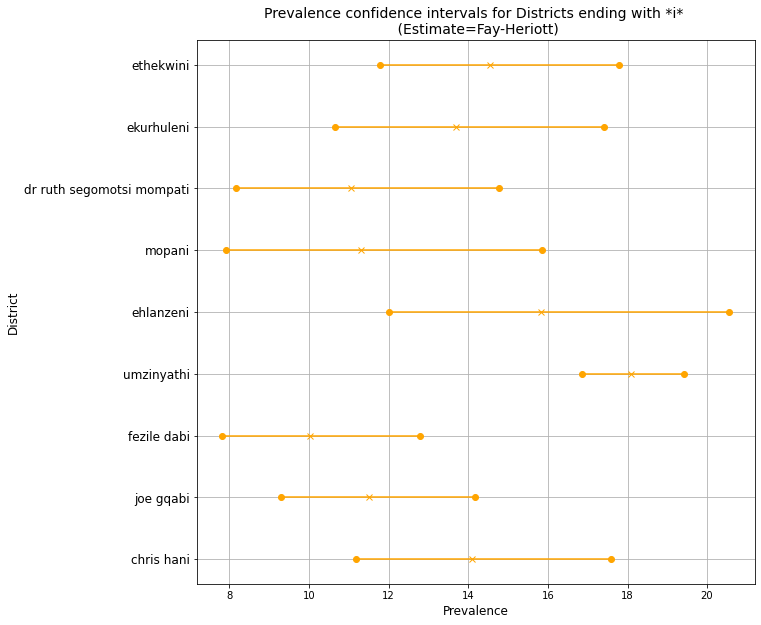

In [191]:
cntr=0
y_tick_names=[]
fig = plt.figure(figsize=(10, 10))
df_fh=df[df['Estimate']=='Fay-Heriott']

for index, row in df_fh.iterrows():
    if (row['District'][-1]=='i'):
        plt.plot([row['PrevalenceLCL'],row['PrevalenceUCL']],[cntr,cntr],'o-', color='orange')
        plt.plot(row['Prevalence'],cntr,'x', color='orange')
        y_tick_names.append(row['District'])
        cntr=cntr+1
        
plt.yticks(range(cntr),y_tick_names, fontsize=12)
plt.xlabel('Prevalence', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.title('Prevalence confidence intervals for Districts ending with *i* \n (Estimate=Fay-Heriott)',fontsize=14)
plt.grid()
plt.show()

Time spent on assignment was approximately 1hr45min.